In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

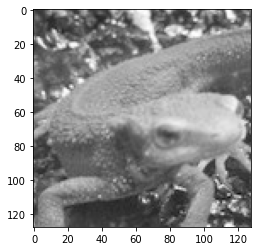

In [3]:
img = cv2.cvtColor(cv2.imread("../imori.jpg"), cv2.COLOR_BGR2GRAY)
H, W = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
pad = 1

output_img_h = np.zeros((H+2*pad, W+2*pad), dtype=np.float)
output_img_v = np.zeros((H+2*pad, W+2*pad), dtype=np.float)
output_img_h[pad:pad+H, pad:pad+W] = img.copy()
output_img_v[pad:pad+H, pad:pad+W] = img.copy()
tmp_img = output_img_h.copy()

for i in range(H):
    for j in range(W):
        output_img_h[i+pad, j+pad] = tmp_img[i+pad, j+pad] - tmp_img[i+pad][j]
        output_img_v[i+pad, j+pad] = tmp_img[i+pad, j+pad] - tmp_img[i][j+pad]

output_img_h = np.clip(output_img_h, 0, 255).astype("uint8")
output_img_v = np.clip(output_img_v, 0, 255).astype("uint8")

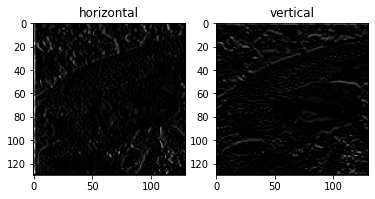

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(output_img_h, cmap="gray")
plt.title("horizontal")
plt.subplot(1, 2, 2)
plt.imshow(output_img_v, cmap="gray")
plt.title("vertical")
plt.show()